In [ ]:
import keras
from keras.datasets import mnist

# Loading - "MNIST Data Set "

### Containing Training samples = 60,000  ,Testing Samples =10,000.

### Divide into train and test dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

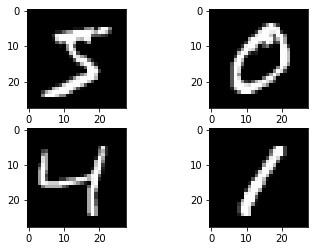

In [ ]:
## just check the graph, how data looks like
import matplotlib.pyplot as plt

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
## in order to execute the graph
## however we dont know whether its colored image or binary images
## so inorder to plot it change the configuration

## Checking the values of each pixel 
### before Normalization

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test/ 255

## After Normalization

In [ ]:
print( x_train[0]) ##  you can see all values are now Normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing image to make it suitable for apply Convolution operation

In [ ]:
# reshape to be [samples][width][height][channels]
x_trainr = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_testr = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

print ("Training Samples dimension : ", x_trainr.shape)
print ("Training Samples dimension : " ,x_testr.shape)

Training Samples dimension :  (60000, 28, 28, 1)
Training Samples dimension :  (10000, 28, 28, 1)


### One hot encoding of the class values from 0 to 9., transforming the vector of class integers into a binary matrix.

In [ ]:
# one hot encode outputs
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Creating a Deep Neural Network
## Training on 60,000 samples of MNIST handwritten dataset

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
def Cnn_model():
    # create model
    model = Sequential()
    
    ## 1st Convolution Layer with 30 feature maps of size 5×5.
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    ## only for first Convolution layer to mention input layer size 
    ## Activation function to make it non-linear, <0, remove, >0 
    model.add(MaxPooling2D())## Maxpooling single maximum value of 2x2 patches
    
    ## 2nd Convolution Layer with 15 feature maps of size 3×3.
    model.add(Conv2D(15, (3, 3), activation='relu'))## 2nd Convolution Layer
    model.add(MaxPooling2D())## Maxpooling single maximum value of 2x2 patches
    model.add(Dropout(0.2))## Dropout layer with a probability of 20%.
    
    ### before using fully connected layer, need to be flatten so that 2D to 1D
    model.add(Flatten())

    #### Fully Connected Layer #1 with 128 neurons and rectifier activation.
    model.add(Dense(128, activation='relu'))
    
    #### Fully Connected Layer #2 with 50 neurons and rectifier activation
    model.add(Dense(50, activation='relu'))
    
    #### Last Fully Connected Layer (Output layer) ,output must be equal to number of classes, 10 (0-9)
    model.add(Dense(num_classes, activation='softmax'))### activation function is changed to softmax ( class probablites)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = Cnn_model()

In [ ]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [ ]:
# Fit the model ## training my model
model.fit(x_trainr, y_train, validation_data=(x_testr, y_test), epochs=10,validation_split=0.03,batch_size=20, verbose=2)

Epoch 1/10
2910/2910 - 38s - loss: 0.1648 - accuracy: 0.9493 - val_loss: 0.0546 - val_accuracy: 0.9878
Epoch 2/10
2910/2910 - 39s - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.0401 - val_accuracy: 0.9911
Epoch 3/10
2910/2910 - 39s - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0370 - val_accuracy: 0.9917
Epoch 4/10
2910/2910 - 40s - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0300 - val_accuracy: 0.9939
Epoch 5/10
2910/2910 - 40s - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0352 - val_accuracy: 0.9922
Epoch 6/10
2910/2910 - 40s - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0331 - val_accuracy: 0.9928
Epoch 7/10
2910/2910 - 40s - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0296 - val_accuracy: 0.9944
Epoch 8/10
2910/2910 - 40s - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0316 - val_accuracy: 0.9944
Epoch 9/10
2910/2910 - 40s - loss: 0.0257 - accuracy: 0.9913 - val_loss: 0.0258 - val_accuracy: 0.9939
Epoch 10/10
2910/2910 - 40s - loss: 0.0211 - accuracy: 0.9934 - val_loss:

In [ ]:
### Evaluting on testing data set MNIST
test_loss,test_acc=model.evaluate(x_testr,y_test)
print ("Test Loss on 10.000 test samples " ,test_loss)
print ("Validation Accuracy on 10.000 test samples  " ,test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0253 - accuracy: 0.9929
Test Loss on 10.000 test samples  0.025250762701034546
Validation Accuracy on 10.000 test samples   0.992900013923645


In [ ]:
# Final evaluation of the model
scores = model.evaluate(x_testr, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.71%


In [ ]:
# predictions = new_model.predict([x_test]) ## there is specialized method for efficeintly saving your model   
predicions =model.predict([x_testr])

In [ ]:
print(predicions)## actually these predictions are based on one hot encodeing so these are only arrays , containing softmax probilites

[[3.0744235e-19 8.4472201e-10 5.7931293e-10 ... 1.0000000e+00
  1.5980368e-13 1.9345461e-10]
 [1.7801778e-12 1.8789512e-09 1.0000000e+00 ... 1.0285910e-09
  1.8544031e-12 1.0987808e-13]
 [3.2082880e-08 9.9999666e-01 5.4409764e-08 ... 4.1133657e-07
  7.6246118e-07 4.2013366e-07]
 ...
 [2.8661928e-18 6.3249317e-08 5.2466961e-11 ... 1.7072912e-08
  1.6503489e-10 5.8710334e-08]
 [3.5089590e-14 2.9432836e-12 3.3997336e-11 ... 6.8347135e-13
  1.1766996e-03 3.6743714e-10]
 [6.3721069e-07 2.5239728e-09 4.1467882e-09 ... 7.6571047e-14
  5.8832145e-10 2.3850810e-10]]


In [ ]:
## in order to understand , convert the predictions from one hot encoding , we need to use numpy for that
import numpy as np

print (np.argmax(predicions[0]))### so acuzlly argmax will return the maximum value index and find the value of it 

7


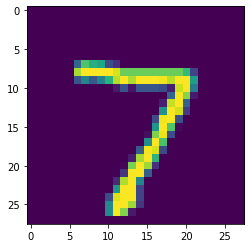

In [ ]:
## now to check that answer is true or not
import matplotlib.pyplot as plt

plt.imshow(x_test[0])

In [ ]:
import cv2

In [ ]:
img =cv2.imread('/content/test_images/5.png')

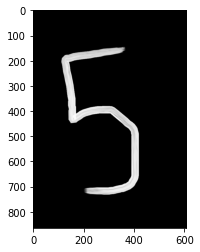

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(864, 608, 3)

In [ ]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(864, 608)

In [ ]:
resized =cv2.resize(gray,(28,28),interpolation =cv2.INTER_AREA)


In [ ]:
resized.shape

(28, 28)

In [ ]:
new_img =resized / 255

In [ ]:
new_img= np.array(new_img).reshape(-1,28,28,1)

In [ ]:
predicions =model.predict(new_img)

In [ ]:
print (np.argmax(predicions))

5
